In [236]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [314]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [238]:
#import dataset 
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding = 'latin')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [239]:
#import dataset 
df2=pd.read_excel('Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [240]:
# Country code column is common for both the data sets, so will merge them by using country code
df=pd.merge(df1, df2, how="inner", on="Country Code")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [241]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

One column "Cuisines" has null values, will hande it later on.

### Exploratory Data Analysis

In [242]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1

In [243]:
#dropping the columns which have unique values and are of no use
df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Longitude', 'Latitude', 'Switch to order menu', 'Locality', 'Locality Verbose', 'Rating color', 'Cuisines'],inplace=True)
df

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...
9546,80,Turkish Lira(TL),No,No,No,3,4.1,Very Good,788,Turkey
9547,105,Turkish Lira(TL),No,No,No,3,4.2,Very Good,1034,Turkey
9548,170,Turkish Lira(TL),No,No,No,4,3.7,Good,661,Turkey
9549,120,Turkish Lira(TL),No,No,No,4,4.0,Very Good,901,Turkey


In [244]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Cost for two,9551.0,1199.210763,16121.183073,0.0,250.0,400.0,700.0,800000.0
Price range,9551.0,1.804837,0.905609,1.0,1.0,2.0,2.0,4.0
Aggregate rating,9551.0,2.666370,1.516378,0.0,2.5,3.2,3.7,4.9
Votes,9551.0,156.909748,430.169145,0.0,5.0,31.0,131.0,10934.0


#### Univariate Analysis

In [245]:
#spliting the columns into two categories for further analysis
numerical_col=['Average Cost for two','Aggregate rating','Votes']  
categorical_col=['Price range','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating text','Country']

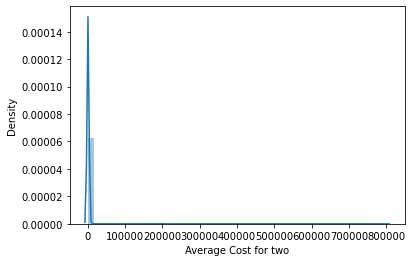

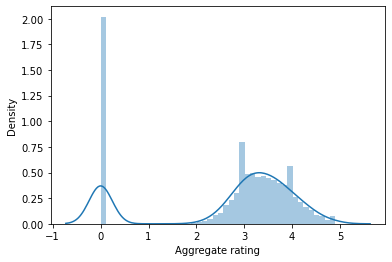

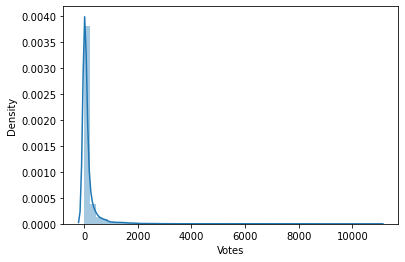

In [246]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

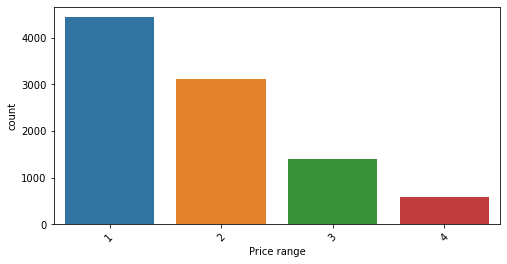

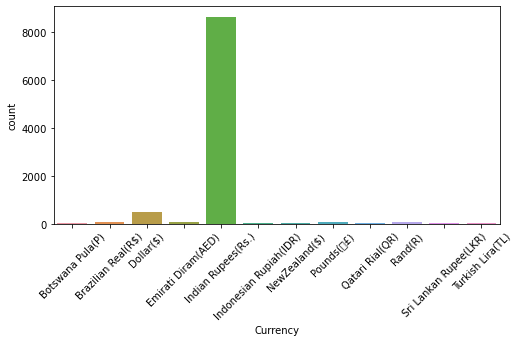

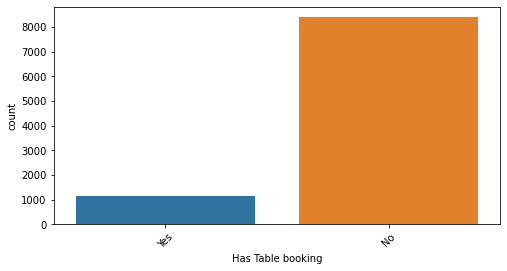

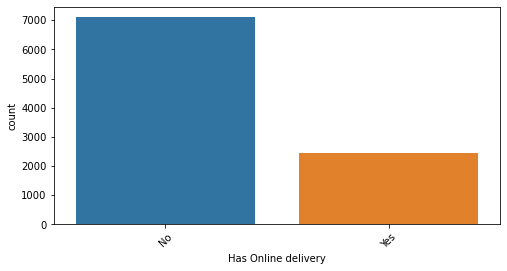

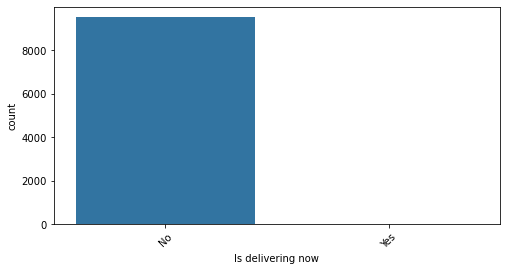

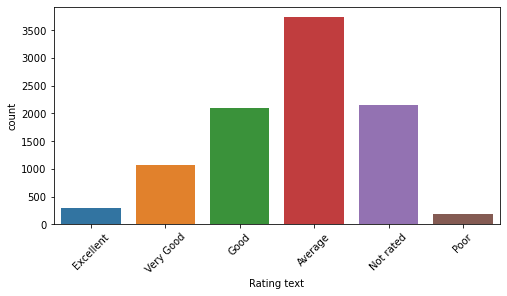

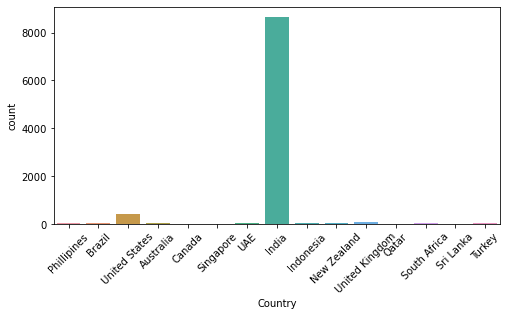

In [247]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(8,4))
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis

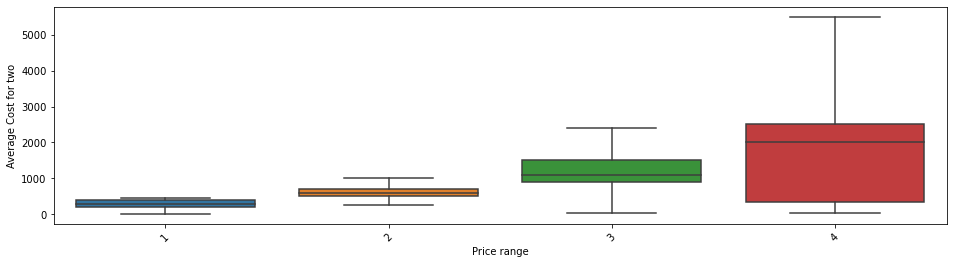

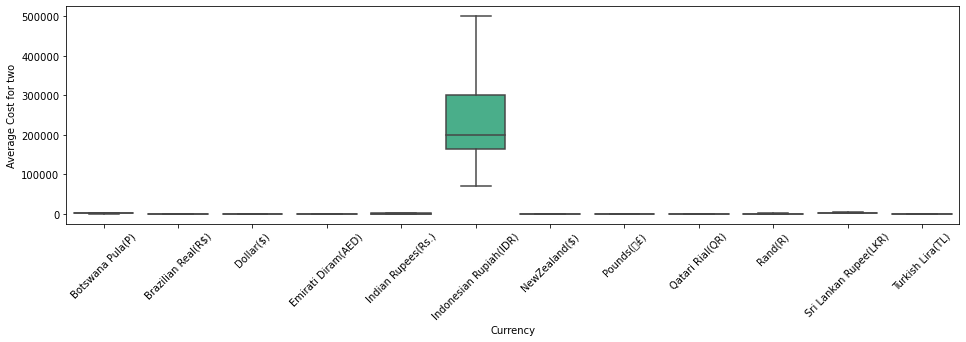

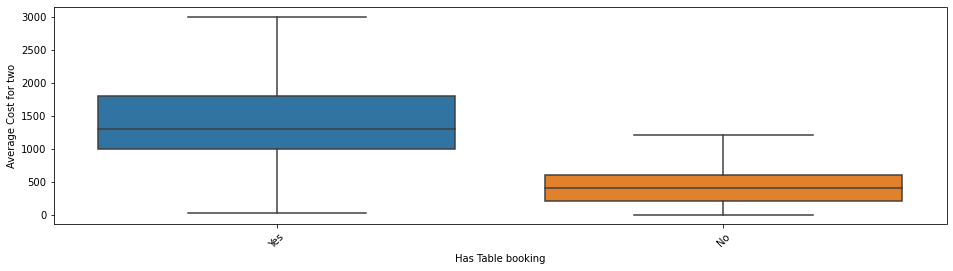

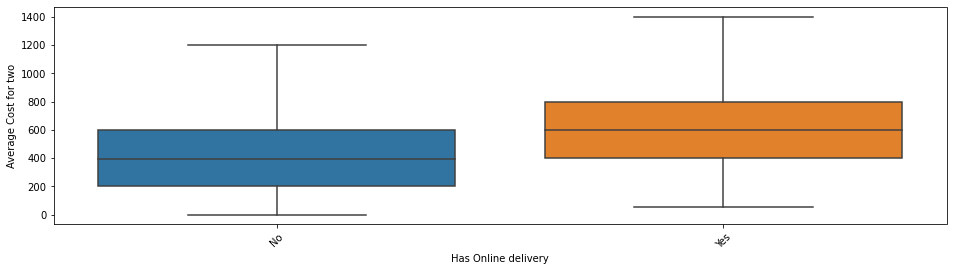

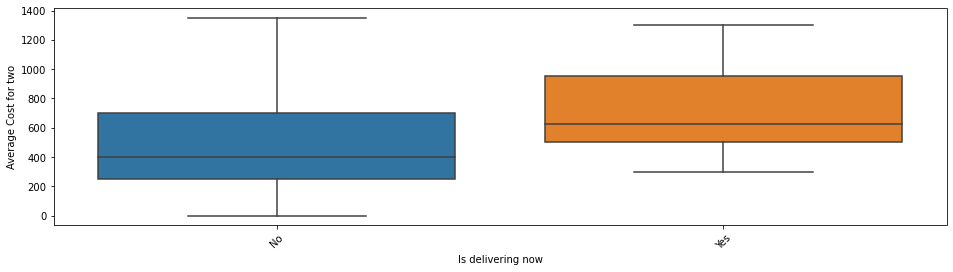

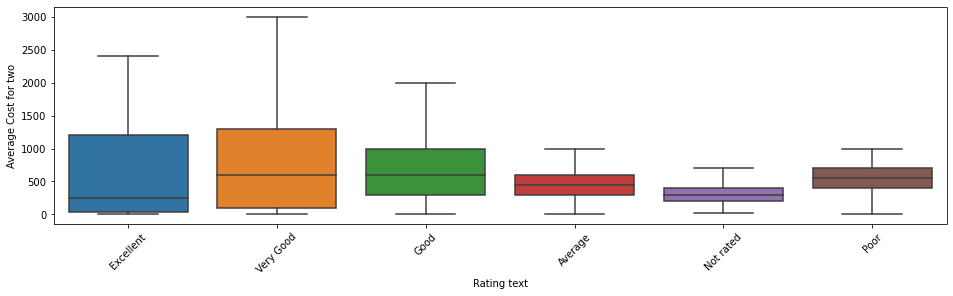

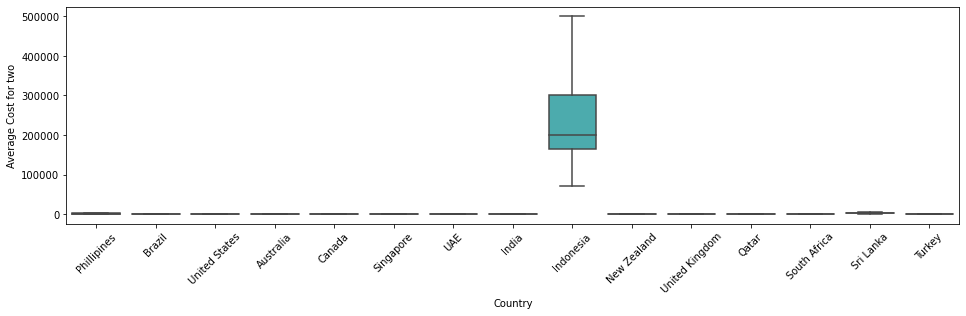

In [248]:
# For all categorical columns compare the values ranges of Average Cost for two(target variable)
for i in categorical_col:
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df[i],y=df['Average Cost for two'], showfliers=False)
    plt.xticks(rotation=45)
    plt.show()

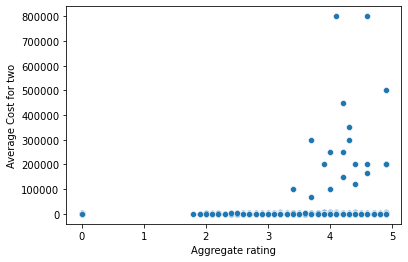

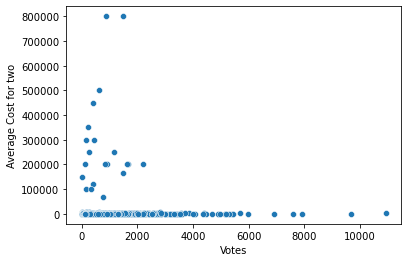

In [249]:
# for all numerical columns check how the Average Cost for two vary
for i in numerical_col[1:]:
    sns.scatterplot(y=df['Average Cost for two'],x=df[i])
    plt.show()

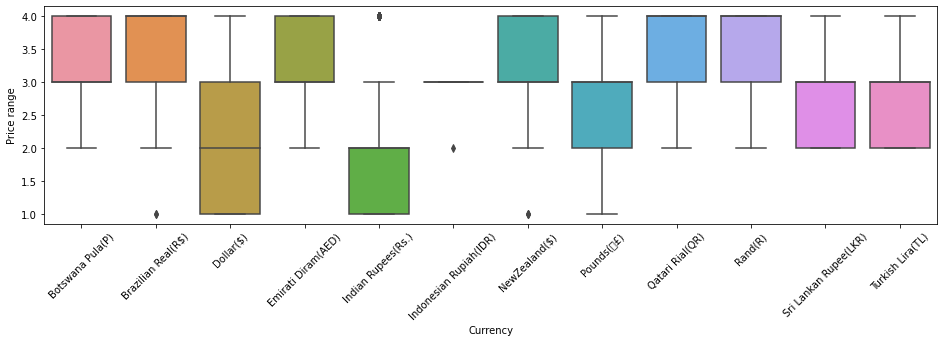

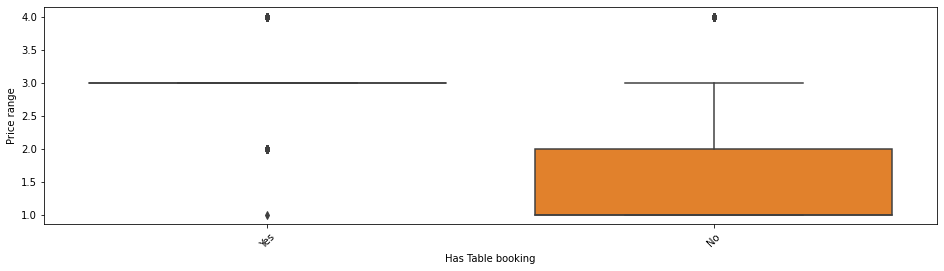

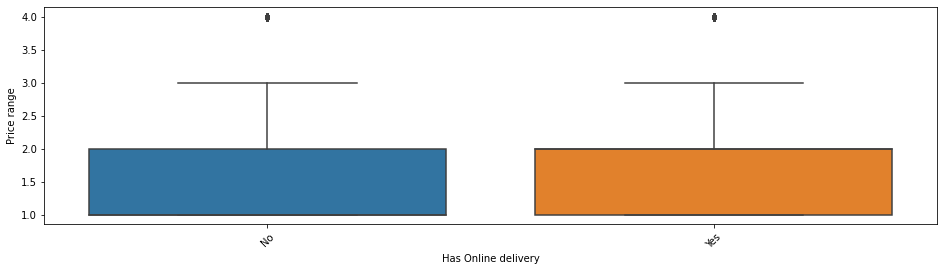

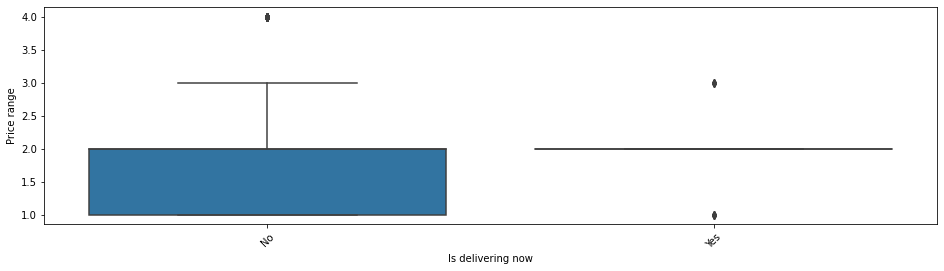

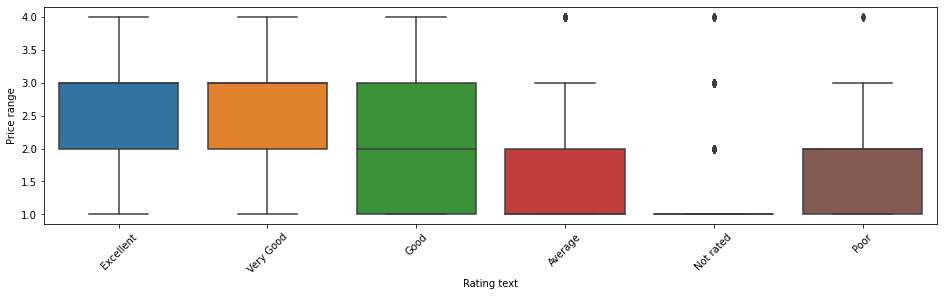

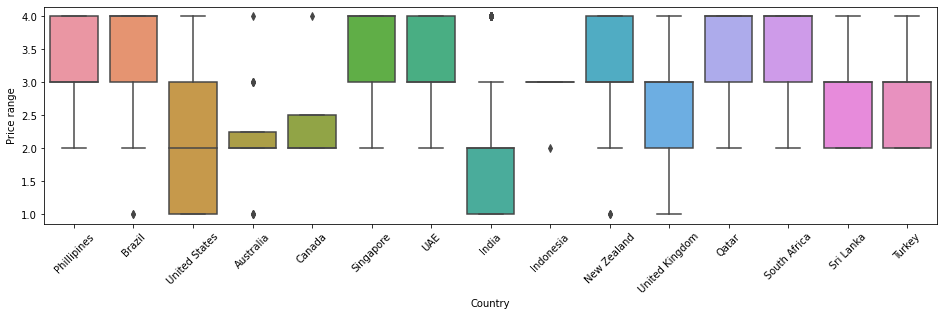

In [250]:
# For all categorical columns compare the values ranges of Price range(target variable)
for i in categorical_col[1:]:
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df[i],y=df['Price range'])
    plt.xticks(rotation=45)
    plt.show()

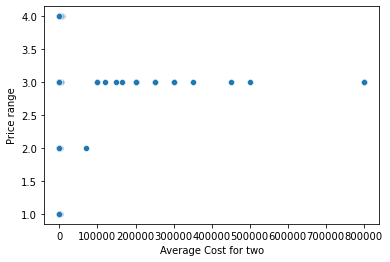

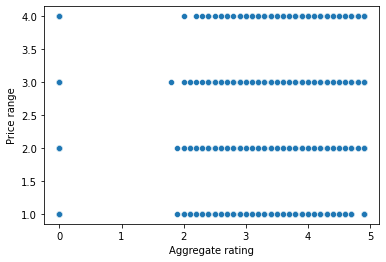

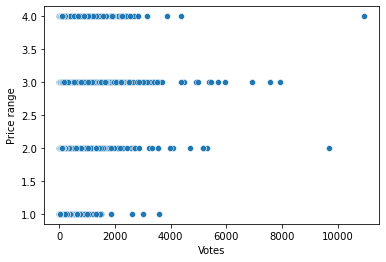

In [251]:
# for all numerical columns check how the Price range vary
for i in numerical_col:
    sns.scatterplot(y=df['Price range'],x=df[i])
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

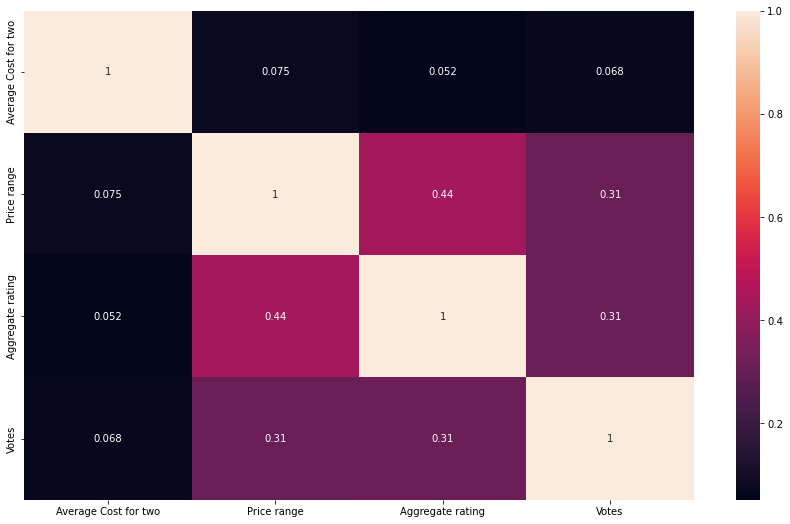

In [252]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [253]:
df

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...
9546,80,Turkish Lira(TL),No,No,No,3,4.1,Very Good,788,Turkey
9547,105,Turkish Lira(TL),No,No,No,3,4.2,Very Good,1034,Turkey
9548,170,Turkish Lira(TL),No,No,No,4,3.7,Good,661,Turkey
9549,120,Turkish Lira(TL),No,No,No,4,4.0,Very Good,901,Turkey


In [254]:
#converting categorical features to numerical values
#one hot encoding of the city column
#dfCity=pd.get_dummies(df['City'],prefix="City")
#dfCity

In [255]:
#one hot encoding of the Currency column
dfCurrency=pd.get_dummies(df['Currency'],prefix="Currency")
dfCurrency

,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(£),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL)
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,0,1
9547,0,0,0,0,0,0,0,0,0,0,0,1
9548,0,0,0,0,0,0,0,0,0,0,0,1
9549,0,0,0,0,0,0,0,0,0,0,0,1


In [256]:
#one hot encoding of the Rating text column
dfRatingText=pd.get_dummies(df['Rating text'],prefix="RatingText")
dfRatingText

,RatingText_Average,RatingText_Excellent,RatingText_Good,RatingText_Not rated,RatingText_Poor,RatingText_Very Good
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
9546,0,0,0,0,0,1
9547,0,0,0,0,0,1
9548,0,0,1,0,0,0
9549,0,0,0,0,0,1


In [257]:
#one hot encoding of the Country column
dfCountry=pd.get_dummies(df['Country'],prefix="Country")
dfCountry

,Country_Australia,Country_Brazil,Country_Canada,Country_India,Country_Indonesia,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9547,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9548,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9549,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [258]:
# Concatenate the original dataframe with dataframes created 
#df=pd.concat([df,dfCity],axis=1)
df=pd.concat([df,dfCurrency],axis=1)
df=pd.concat([df,dfRatingText],axis=1)
df=pd.concat([df,dfCountry],axis=1)
df

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,...,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States
0,1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines,...,0,1,0,0,0,0,0,0,0,0
1,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines,...,0,1,0,0,0,0,0,0,0,0
2,4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines,...,0,1,0,0,0,0,0,0,0,0
3,1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines,...,0,1,0,0,0,0,0,0,0,0
4,1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,80,Turkish Lira(TL),No,No,No,3,4.1,Very Good,788,Turkey,...,0,0,0,0,0,0,1,0,0,0
9547,105,Turkish Lira(TL),No,No,No,3,4.2,Very Good,1034,Turkey,...,0,0,0,0,0,0,1,0,0,0
9548,170,Turkish Lira(TL),No,No,No,4,3.7,Good,661,Turkey,...,0,0,0,0,0,0,1,0,0,0
9549,120,Turkish Lira(TL),No,No,No,4,4.0,Very Good,901,Turkey,...,0,0,0,0,0,0,1,0,0,0


In [259]:
# map "No" to 0 and "Yes" to 1
df['Has Table booking']=df['Has Table booking'].map({'No':0,'Yes':1})

In [260]:
#map "No" to 0 and "Yes" to 1
df['Is delivering now']=df['Is delivering now'].map({'No':0,'Yes':1})

In [261]:
# map "No" to 0 and "Yes" to 1
df['Has Online delivery']=df['Has Online delivery'].map({'No':0,'Yes':1})

In [262]:
df.columns

Index(['Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes', 'Country',
       'Currency_Botswana Pula(P)', 'Currency_Brazilian Real(R$)',
       'Currency_Dollar($)', 'Currency_Emirati Diram(AED)',
       'Currency_Indian Rupees(Rs.)', 'Currency_Indonesian Rupiah(IDR)',
       'Currency_NewZealand($)', 'Currency_Pounds(£)',
       'Currency_Qatari Rial(QR)', 'Currency_Rand(R)',
       'Currency_Sri Lankan Rupee(LKR)', 'Currency_Turkish Lira(TL)',
       'RatingText_Average', 'RatingText_Excellent', 'RatingText_Good',
       'RatingText_Not rated', 'RatingText_Poor', 'RatingText_Very Good',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_India', 'Country_Indonesia', 'Country_New Zealand',
       'Country_Phillipines', 'Country_Qatar', 'Country_Singapore',
       'Country_South Africa', 'Country_Sri Lanka', 'Country_Turkey',
       'Cou

#### Check for correlation in the columns that were One-Hot-Encoded

In [263]:
#ohe_cols=dfCity.columns.tolist()+dfCurrency.columns.tolist()+dfRatingText.columns.tolist()+dfCountry.columns.tolist()
ohe_cols=dfCurrency.columns.tolist()+dfRatingText.columns.tolist()+dfCountry.columns.tolist()
ohe_cols

['Currency_Botswana Pula(P)',
 'Currency_Brazilian Real(R$)',
 'Currency_Dollar($)',
 'Currency_Emirati Diram(AED)',
 'Currency_Indian Rupees(Rs.)',
 'Currency_Indonesian Rupiah(IDR)',
 'Currency_NewZealand($)',
 'Currency_Pounds(\x8c£)',
 'Currency_Qatari Rial(QR)',
 'Currency_Rand(R)',
 'Currency_Sri Lankan Rupee(LKR)',
 'Currency_Turkish Lira(TL)',
 'RatingText_Average',
 'RatingText_Excellent',
 'RatingText_Good',
 'RatingText_Not rated',
 'RatingText_Poor',
 'RatingText_Very Good',
 'Country_Australia',
 'Country_Brazil',
 'Country_Canada',
 'Country_India',
 'Country_Indonesia',
 'Country_New Zealand',
 'Country_Phillipines',
 'Country_Qatar',
 'Country_Singapore',
 'Country_South Africa',
 'Country_Sri Lanka',
 'Country_Turkey',
 'Country_UAE',
 'Country_United Kingdom',
 'Country_United States']

In [264]:
"""
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")
"""

'\n# Plot a heatmap using dataframe correlation values\nplt.figure(figsize=(15,9))\nsns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")\n'

In [265]:
df.corr()[df.corr()<1].min().sort_values()

RatingText_Not rated              -0.947216
Aggregate rating                  -0.947216
Country_India                     -0.715191
Currency_Indian Rupees(Rs.)       -0.715191
Currency_Dollar($)                -0.715191
Country_United States             -0.676858
RatingText_Average                -0.431854
RatingText_Good                   -0.425624
Price range                       -0.338897
RatingText_Very Good              -0.323309
RatingText_Excellent              -0.321541
Currency_Pounds(£)               -0.285119
Country_United Kingdom            -0.285119
Has Online delivery               -0.261368
Currency_Brazilian Real(R$)       -0.246660
Country_Brazil                    -0.246660
Currency_Emirati Diram(AED)       -0.246660
Country_UAE                       -0.246660
Currency_Rand(R)                  -0.246660
Country_South Africa              -0.246660
Votes                             -0.202525
Currency_NewZealand($)            -0.201185
Country_New Zealand             

In [266]:
df.corr()[df.corr()<1].max().sort_values()

Country_Sri Lanka                  0.063241
Currency_Sri Lankan Rupee(LKR)     0.063241
Country_Canada                     0.088788
Country_Turkey                     0.089843
Currency_Turkish Lira(TL)          0.089843
Country_Qatar                      0.093339
Currency_Qatari Rial(QR)           0.093339
Is delivering now                  0.101730
Currency_NewZealand($)             0.104895
Country_New Zealand                0.104895
RatingText_Poor                    0.118429
Currency_Emirati Diram(AED)        0.123961
Country_UAE                        0.123961
Country_United Kingdom             0.134665
Currency_Pounds(£)                0.134665
Currency_Brazilian Real(R$)        0.140058
Country_Brazil                     0.140058
Country_Phillipines                0.141350
Currency_Botswana Pula(P)          0.141350
Country_South Africa               0.156155
Currency_Rand(R)                   0.156155
RatingText_Not rated               0.165905
Country_Singapore               

In [267]:
df.drop(columns=['RatingText_Not rated','Country_United States'],inplace=True)

In [268]:
df.corr()[df.corr()<1].min().sort_values()

Currency_Indian Rupees(Rs.)       -0.715191
Country_India                     -0.715191
Currency_Dollar($)                -0.715191
RatingText_Good                   -0.425624
RatingText_Average                -0.425624
RatingText_Very Good              -0.323309
RatingText_Excellent              -0.321541
Aggregate rating                  -0.292664
Currency_Pounds(£)               -0.285119
Country_United Kingdom            -0.285119
Price range                       -0.284869
Country_Brazil                    -0.246660
Currency_Brazilian Real(R$)       -0.246660
Country_UAE                       -0.246660
Currency_Emirati Diram(AED)       -0.246660
Country_South Africa              -0.246660
Currency_Rand(R)                  -0.246660
Votes                             -0.202525
Currency_NewZealand($)            -0.201185
Country_New Zealand               -0.201185
Country_Turkey                    -0.185425
Currency_Turkish Lira(TL)         -0.185425
Country_Australia               

In [269]:
df.corr()[df.corr()<1].max().sort_values()

Country_Sri Lanka                  0.063241
Currency_Sri Lankan Rupee(LKR)     0.063241
Country_Canada                     0.088788
Currency_Turkish Lira(TL)          0.089843
Country_Turkey                     0.089843
Country_Qatar                      0.093339
Currency_Qatari Rial(QR)           0.093339
Is delivering now                  0.101730
Country_New Zealand                0.104895
Currency_NewZealand($)             0.104895
RatingText_Poor                    0.118429
Country_UAE                        0.123961
Currency_Emirati Diram(AED)        0.123961
Currency_Pounds(£)                0.134665
Country_United Kingdom             0.134665
Currency_Brazilian Real(R$)        0.140058
Country_Brazil                     0.140058
Currency_Botswana Pula(P)          0.141350
Country_Phillipines                0.141350
Currency_Rand(R)                   0.156155
Country_South Africa               0.156155
Country_Singapore                  0.198702
Currency_Indian Rupees(Rs.)     

In [270]:
df.columns

Index(['Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes', 'Country',
       'Currency_Botswana Pula(P)', 'Currency_Brazilian Real(R$)',
       'Currency_Dollar($)', 'Currency_Emirati Diram(AED)',
       'Currency_Indian Rupees(Rs.)', 'Currency_Indonesian Rupiah(IDR)',
       'Currency_NewZealand($)', 'Currency_Pounds(£)',
       'Currency_Qatari Rial(QR)', 'Currency_Rand(R)',
       'Currency_Sri Lankan Rupee(LKR)', 'Currency_Turkish Lira(TL)',
       'RatingText_Average', 'RatingText_Excellent', 'RatingText_Good',
       'RatingText_Poor', 'RatingText_Very Good', 'Country_Australia',
       'Country_Brazil', 'Country_Canada', 'Country_India',
       'Country_Indonesia', 'Country_New Zealand', 'Country_Phillipines',
       'Country_Qatar', 'Country_Singapore', 'Country_South Africa',
       'Country_Sri Lanka', 'Country_Turkey', 'Country_UAE',
       'Country_Unit

In [271]:
# Drop columns for which we have already made dummy columns
df.drop(columns=['Currency','Rating text','Country'],inplace=True)

In [272]:
df.columns

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Votes',
       'Currency_Botswana Pula(P)', 'Currency_Brazilian Real(R$)',
       'Currency_Dollar($)', 'Currency_Emirati Diram(AED)',
       'Currency_Indian Rupees(Rs.)', 'Currency_Indonesian Rupiah(IDR)',
       'Currency_NewZealand($)', 'Currency_Pounds(£)',
       'Currency_Qatari Rial(QR)', 'Currency_Rand(R)',
       'Currency_Sri Lankan Rupee(LKR)', 'Currency_Turkish Lira(TL)',
       'RatingText_Average', 'RatingText_Excellent', 'RatingText_Good',
       'RatingText_Poor', 'RatingText_Very Good', 'Country_Australia',
       'Country_Brazil', 'Country_Canada', 'Country_India',
       'Country_Indonesia', 'Country_New Zealand', 'Country_Phillipines',
       'Country_Qatar', 'Country_Singapore', 'Country_South Africa',
       'Country_Sri Lanka', 'Country_Turkey', 'Country_UAE',
       'Country_United Kingdom'],
      dtype='object')

In [273]:
# Create X with all independent variable
X=df.drop(columns=['Average Cost for two', 'Price range'])
X

,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),...,Country_Indonesia,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom
0,1,0,0,4.8,314,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,4.5,591,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,4.4,270,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,4.9,365,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,4.8,229,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,4.1,788,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9547,0,0,0,4.2,1034,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9548,0,0,0,3.7,661,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9549,0,0,0,4.0,901,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [275]:
#Feature scaling
ss=StandardScaler()

In [276]:
X.columns

Index(['Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Aggregate rating', 'Votes', 'Currency_Botswana Pula(P)',
       'Currency_Brazilian Real(R$)', 'Currency_Dollar($)',
       'Currency_Emirati Diram(AED)', 'Currency_Indian Rupees(Rs.)',
       'Currency_Indonesian Rupiah(IDR)', 'Currency_NewZealand($)',
       'Currency_Pounds(£)', 'Currency_Qatari Rial(QR)', 'Currency_Rand(R)',
       'Currency_Sri Lankan Rupee(LKR)', 'Currency_Turkish Lira(TL)',
       'RatingText_Average', 'RatingText_Excellent', 'RatingText_Good',
       'RatingText_Poor', 'RatingText_Very Good', 'Country_Australia',
       'Country_Brazil', 'Country_Canada', 'Country_India',
       'Country_Indonesia', 'Country_New Zealand', 'Country_Phillipines',
       'Country_Qatar', 'Country_Singapore', 'Country_South Africa',
       'Country_Sri Lanka', 'Country_Turkey', 'Country_UAE',
       'Country_United Kingdom'],
      dtype='object')

In [277]:
# Apply standard scaler on only relevant columns
X[['Aggregate rating','Votes']]=ss.fit_transform(X[['Aggregate rating','Votes']])
X

,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),...,Country_Indonesia,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom
0,1,0,0,1.407131,0.365202,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1.209281,1.009168,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1.143331,0.262911,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.473081,0.483766,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1.407131,0.167595,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0.945480,1.467151,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9547,0,0,0,1.011430,2.039049,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9548,0,0,0,0.681680,1.171903,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9549,0,0,0,0.879530,1.729853,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [278]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
35,inf,Country_United Kingdom
12,inf,Currency_Pounds(£)
27,inf,Country_New Zealand
23,inf,Country_Brazil
28,inf,Country_Phillipines
29,inf,Country_Qatar
31,inf,Country_South Africa
16,inf,Currency_Turkish Lira(TL)
15,inf,Currency_Sri Lankan Rupee(LKR)
14,inf,Currency_Rand(R)


In [279]:
#Dropping column Country_United Kingdom as its vif value is very high
X.drop(columns=['Country_United Kingdom'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
34,inf,Country_UAE
23,inf,Country_Brazil
26,inf,Country_Indonesia
27,inf,Country_New Zealand
28,inf,Country_Phillipines
16,inf,Currency_Turkish Lira(TL)
15,inf,Currency_Sri Lankan Rupee(LKR)
14,inf,Currency_Rand(R)
13,inf,Currency_Qatari Rial(QR)
29,inf,Country_Qatar


In [280]:
#Dropping column Country_UAE as its vif value is very high
X.drop(columns=['Country_UAE'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
33,inf,Country_Turkey
23,inf,Country_Brazil
25,inf,Country_India
26,inf,Country_Indonesia
16,inf,Currency_Turkish Lira(TL)
15,inf,Currency_Sri Lankan Rupee(LKR)
14,inf,Currency_Rand(R)
13,inf,Currency_Qatari Rial(QR)
27,inf,Country_New Zealand
11,inf,Currency_NewZealand($)


In [281]:
#Dropping column Currency_Turkish Lira(TL) as its vif value is very high
X.drop(columns=['Currency_Turkish Lira(TL)'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
24,inf,Country_India
10,inf,Currency_Indonesian Rupiah(IDR)
28,inf,Country_Qatar
15,inf,Currency_Sri Lankan Rupee(LKR)
14,inf,Currency_Rand(R)
13,inf,Currency_Qatari Rial(QR)
25,inf,Country_Indonesia
11,inf,Currency_NewZealand($)
9,inf,Currency_Indian Rupees(Rs.)
22,inf,Country_Brazil


In [282]:
#Dropping column Country_India as its vif value is very high
X.drop(columns=['Country_India'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
25,inf,Country_New Zealand
10,inf,Currency_Indonesian Rupiah(IDR)
15,inf,Currency_Sri Lankan Rupee(LKR)
14,inf,Currency_Rand(R)
13,inf,Currency_Qatari Rial(QR)
24,inf,Country_Indonesia
11,inf,Currency_NewZealand($)
26,inf,Country_Phillipines
22,inf,Country_Brazil
6,inf,Currency_Brazilian Real(R$)


In [283]:
#Dropping column Currency_Sri Lankan Rupee(LKR) as its vif value is very high
X.drop(columns=['Currency_Sri Lankan Rupee(LKR)'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
11,inf,Currency_NewZealand($)
10,inf,Currency_Indonesian Rupiah(IDR)
24,inf,Country_New Zealand
25,inf,Country_Phillipines
14,inf,Currency_Rand(R)
13,inf,Currency_Qatari Rial(QR)
23,inf,Country_Indonesia
21,inf,Country_Brazil
6,inf,Currency_Brazilian Real(R$)
5,inf,Currency_Botswana Pula(P)


In [284]:
#Dropping column Currency_Indonesian Rupiah(IDR) as its vif value is very high
X.drop(columns=['Currency_Indonesian Rupiah(IDR)'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
10,inf,Currency_NewZealand($)
6,inf,Currency_Brazilian Real(R$)
24,inf,Country_Phillipines
13,inf,Currency_Rand(R)
12,inf,Currency_Qatari Rial(QR)
20,inf,Country_Brazil
23,inf,Country_New Zealand
5,inf,Currency_Botswana Pula(P)
25,inf,Country_Qatar
27,inf,Country_South Africa


In [285]:
#Dropping column Country_New Zealand as its vif value is very high
X.drop(columns=['Country_New Zealand'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
12,inf,Currency_Qatari Rial(QR)
26,inf,Country_South Africa
24,inf,Country_Qatar
5,inf,Currency_Botswana Pula(P)
6,inf,Currency_Brazilian Real(R$)
23,inf,Country_Phillipines
20,inf,Country_Brazil
13,inf,Currency_Rand(R)
9,207.562182,Currency_Indian Rupees(Rs.)
16,75.057259,RatingText_Good


In [286]:
#Dropping column Currency_Qatari Rial(QR) as its vif value is very high
X.drop(columns=['Currency_Qatari Rial(QR)'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
25,inf,Country_South Africa
22,inf,Country_Phillipines
5,inf,Currency_Botswana Pula(P)
6,inf,Currency_Brazilian Real(R$)
19,inf,Country_Brazil
12,inf,Currency_Rand(R)
9,207.562182,Currency_Indian Rupees(Rs.)
15,75.057259,RatingText_Good
3,72.941667,Aggregate rating
13,72.074661,RatingText_Average


In [287]:
#Dropping column Currency_Rand(R) as its vif value is very high
X.drop(columns=['Currency_Rand(R)'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
21,inf,Country_Phillipines
5,inf,Currency_Botswana Pula(P)
6,inf,Currency_Brazilian Real(R$)
18,inf,Country_Brazil
9,207.562182,Currency_Indian Rupees(Rs.)
14,75.057259,RatingText_Good
3,72.941667,Aggregate rating
12,72.074661,RatingText_Average
16,55.922866,RatingText_Very Good
13,21.872617,RatingText_Excellent


In [288]:
#Dropping column Country_Brazil as its vif value is very high
X.drop(columns=['Country_Brazil'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
20,inf,Country_Phillipines
5,inf,Currency_Botswana Pula(P)
9,207.562182,Currency_Indian Rupees(Rs.)
14,75.057259,RatingText_Good
3,72.941667,Aggregate rating
12,72.074661,RatingText_Average
16,55.922866,RatingText_Very Good
13,21.872617,RatingText_Excellent
7,12.502412,Currency_Dollar($)
15,4.305799,RatingText_Poor


In [289]:
#Dropping column Country_Phillipines as its vif value is very high
X.drop(columns=['Country_Phillipines'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
9,207.562182,Currency_Indian Rupees(Rs.)
14,75.057259,RatingText_Good
3,72.941667,Aggregate rating
12,72.074661,RatingText_Average
16,55.922866,RatingText_Very Good
13,21.872617,RatingText_Excellent
7,12.502412,Currency_Dollar($)
15,4.305799,RatingText_Poor
11,2.914008,Currency_Pounds(£)
8,2.420971,Currency_Emirati Diram(AED)


In [290]:
#Dropping column Currency_Indian Rupees(Rs.) as its vif value is very high
X.drop(columns=['Currency_Indian Rupees(Rs.)'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
15,1.681073,RatingText_Very Good
1,1.584016,Has Online delivery
13,1.574304,RatingText_Good
3,1.479852,Aggregate rating
12,1.447765,RatingText_Excellent
7,1.401733,Currency_Dollar($)
11,1.376718,RatingText_Average
4,1.349699,Votes
0,1.251514,Has Table booking
10,1.067606,Currency_Pounds(£)


### Model Building - Target variable - Average Cost for two

In [291]:
# Create y with only target variable
y=df['Average Cost for two']
y

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

In [292]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [293]:
X_train

,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_NewZealand($),...,RatingText_Poor,RatingText_Very Good,Country_Australia,Country_Canada,Country_Indonesia,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey
1868,1,0,0,1.143331,0.021133,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7742,0,0,0,0.285979,-0.332235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4357,0,0,0,0.022179,-0.334560,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6256,0,0,0,0.285979,-0.336885,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832,0,0,0,1.209281,0.518638,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,0,0,0,-1.758473,-0.364782,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2259,0,1,0,0.154079,-0.334560,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2982,0,1,0,0.417880,-0.276440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5308,0,0,0,-1.758473,-0.362457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
X_test

,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_NewZealand($),...,RatingText_Poor,RatingText_Very Good,Country_Australia,Country_Canada,Country_Indonesia,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey
4720,0,0,0,0.285979,-0.318286,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534,0,0,0,-0.043771,-0.327585,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7583,0,0,0,-1.758473,-0.362457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2094,0,0,0,-1.758473,-0.362457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1451,1,1,0,0.022179,0.625578,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7077,0,0,0,0.813580,1.320690,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1183,0,0,0,-1.758473,-0.364782,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0.549780,-0.232269,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,0,1,0,0.615730,0.009509,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
y_train

1868    1250
7742     150
4357     150
6256     200
832      350
        ... 
8714     200
2259     150
2982     300
5308     200
1199     600
Name: Average Cost for two, Length: 7163, dtype: int64

In [296]:
y_test

4720     550
534      120
7583     350
2094     250
1451    1100
        ... 
7077     700
1183     250
381       10
1118     300
2357     800
Name: Average Cost for two, Length: 2388, dtype: int64

#### Linear Regression

In [297]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [298]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([1843.81558713,  402.70757849,  523.57547293, ...,  254.81603014,
        326.53096643,  573.42207058])

In [299]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

64084173.360612616

In [300]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.7083885947197746

In [301]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([ 404.50836229, -115.30948865,  326.53096643, ..., -133.91171674,
        611.83879166,  566.84038435])

In [302]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

157858789.70597526

In [303]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.584754051074833

<AxesSubplot:xlabel='Average Cost for two'>

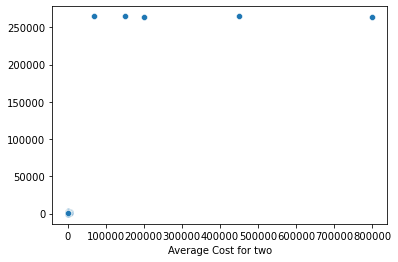

In [304]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

#### Random Forest

In [305]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [306]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([1146.        ,  353.37618237,  225.03065476, ...,  367.85119048,
        317.38017123,  505.95952381])

In [307]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

15579359.946113978

In [308]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9291070039760387

In [309]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([476.42757937,  21.45      , 317.38017123, ...,  34.1625    ,
       573.3       , 635.15      ])

In [310]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

172949168.53541315

In [311]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.5450589622657682

<AxesSubplot:xlabel='Average Cost for two'>

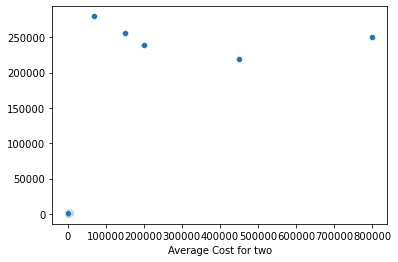

In [312]:
sns.scatterplot(x=y_test,y=y_test_pred)

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [330]:
param_grid = {
    'bootstrap': [True],
    #'max_depth': [20, 25, 30],
    'max_depth': [30],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["sqrt"],
    #'n_estimators': [200, 250, 300]
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [331]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300
[CV 1/5; 1/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.651 total time=   1.0s
[CV 2/5; 1/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300
[CV 2/5; 1/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.724 total time=   1.2s
[CV 3/5; 1/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300
[CV 3/5; 1/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.421 total time=   1.1s
[CV 4/5; 1/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf

[CV 5/5; 6/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.985 total time=   0.6s
[CV 1/5; 7/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=300
[CV 1/5; 7/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=300;, score=0.563 total time=   0.5s
[CV 2/5; 7/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=300
[CV 2/5; 7/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=300;, score=0.700 total time=   0.5s
[CV 3/5; 7/9] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=300
[CV 3/5; 7/9] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=300;, score=0.359 total 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [300]},
             verbose=10)

In [332]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}


In [333]:
#Fit the random forest classifier model
rf=RandomForestRegressor(**best_params)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=4,
                      n_estimators=300)

In [334]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([1117.14480159,  348.10949049,  218.08710919, ...,  362.25701058,
        318.76505117,  491.69669312])

In [335]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

25774243.088421233

In [336]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.8827157650180728

In [337]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([445.77827929,  54.6175    , 318.76505117, ...,  33.34698413,
       627.12037037, 614.85679951])

In [338]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

183080821.85719302

In [339]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.5184077507265221

<AxesSubplot:xlabel='Average Cost for two'>

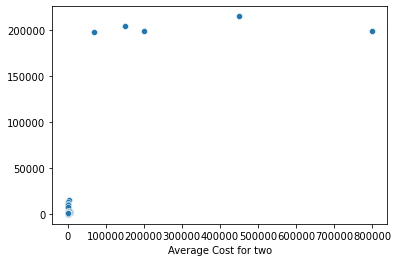

In [340]:
sns.scatterplot(x=y_test,y=y_test_pred)

##### After hyperparameter tuning there is a slight increase in the test R2 score.

In [341]:
# Saving the best model
pickle.dump(rf, open('model_zomato_regression.pkl', 'wb'))

### Model Building - Target variable - Price Range

In [347]:
# Create y with only target variable
y=df['Price range']
y

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64

In [348]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [349]:
X_train

,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_NewZealand($),...,RatingText_Poor,RatingText_Very Good,Country_Australia,Country_Canada,Country_Indonesia,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey
1868,1,0,0,1.143331,0.021133,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7742,0,0,0,0.285979,-0.332235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4357,0,0,0,0.022179,-0.334560,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6256,0,0,0,0.285979,-0.336885,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832,0,0,0,1.209281,0.518638,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,0,0,0,-1.758473,-0.364782,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2259,0,1,0,0.154079,-0.334560,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2982,0,1,0,0.417880,-0.276440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5308,0,0,0,-1.758473,-0.362457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [350]:
X_test

,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_NewZealand($),...,RatingText_Poor,RatingText_Very Good,Country_Australia,Country_Canada,Country_Indonesia,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey
4720,0,0,0,0.285979,-0.318286,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534,0,0,0,-0.043771,-0.327585,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7583,0,0,0,-1.758473,-0.362457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2094,0,0,0,-1.758473,-0.362457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1451,1,1,0,0.022179,0.625578,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7077,0,0,0,0.813580,1.320690,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1183,0,0,0,-1.758473,-0.364782,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0.549780,-0.232269,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,0,1,0,0.615730,0.009509,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
y_train

1868    3
7742    1
4357    1
6256    1
832     2
       ..
8714    1
2259    1
2982    1
5308    1
1199    2
Name: Price range, Length: 7163, dtype: int64

In [352]:
y_test

4720    2
534     4
7583    1
2094    1
1451    3
       ..
7077    2
1183    1
381     1
1118    1
2357    2
Name: Price range, Length: 2388, dtype: int64

#### Logistic Regression

In [353]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [354]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([3, 1, 1, ..., 2, 1, 2], dtype=int64)

In [355]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.6151054027642049

In [356]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([1, 2, 1, ..., 1, 2, 2], dtype=int64)

In [357]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[921, 184,   7,   0],
       [370, 363,  52,   2],
       [ 59,  98, 163,  14],
       [ 15,  28,  85,  27]], dtype=int64)

In [358]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.6172529313232831

#### Random Forest

In [359]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [360]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([3, 1, 1, ..., 1, 1, 2], dtype=int64)

In [361]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.8743543208153008

In [362]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([2, 2, 1, ..., 4, 2, 2], dtype=int64)

In [363]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[871, 198,  36,   7],
       [380, 304,  88,  15],
       [ 44,  88, 151,  51],
       [ 17,  22,  64,  52]], dtype=int64)

In [364]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.5770519262981575

The random forest classifier has lower accuracy score then Logistic regression model.
But in Random forest model as we can see the train accuracy score is 87% but the test accuracy score is low, this means model is overfitting.

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [402]:
param_grid = {
    'bootstrap': [True],
    #'max_depth': [6, 8, 10],
    'max_depth': [8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["sqrt"],
    #'n_estimators': [50, 100, 150]
    'n_estimators': [50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [403]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/5; 1/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.625 total time=   0.0s
[CV 2/5; 1/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/5; 1/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.617 total time=   0.0s
[CV 3/5; 1/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/5; 1/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.600 total time=   0.0s
[CV 4/5; 1/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_sampl

[CV 5/5; 6/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.613 total time=   0.0s
[CV 1/5; 7/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/5; 7/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.625 total time=   0.0s
[CV 2/5; 7/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/5; 7/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.612 total time=   0.0s
[CV 3/5; 7/9] START bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 3/5; 7/9] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.600 total time=   0.0s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [8],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5], 'n_estimators': [50]},
             verbose=10)

In [404]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


In [405]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_split=4,
                       n_estimators=50)

In [406]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([3, 1, 1, ..., 1, 1, 2], dtype=int64)

In [407]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.6544743822420773

In [408]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([1, 2, 1, ..., 1, 2, 2], dtype=int64)

In [409]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[924, 176,  12,   0],
       [367, 344,  74,   2],
       [ 29, 112, 182,  11],
       [  9,  32,  83,  31]], dtype=int64)

In [410]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.6201842546063652

##### After hyperparameter tuning there is very slight change in the train and test accuracy.

In [411]:
# Saving the best model
pickle.dump(rf, open('model_zomato_classification.pkl', 'wb'))